# Bike Sharing Demand


## Overview
Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. <br>


## What are the Variables..?

1. datetime - hourly date + timestamp  <br>
2. season -  1 = spring, 2 = summer, 3 = fall, 4 = winter <br>
3. holiday - whether the day is considered a holiday<br>
4. workingday - whether the day is neither a weekend nor holiday<br>
5. weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>
6. temp - temperature in Celsius<br>
7. atemp - "feels like" temperature in Celsius<br>
8. humidity - relative humidity<br>
9. windspeed - wind speed<br>
10. casual - number of non-registered user rentals initiated<br>
11. registered - number of registered user rentals initiated<br>
12. count - number of total rentals<br>

## Load The Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from datetime import datetime

## Get The Data

In [4]:
train=pd.read_csv('/home/abhi/Desktop/CSV/Bike Sharing/train.csv')
test=pd.read_csv('/home/abhi/Desktop/CSV/Bike Sharing/test.csv')

## Data Summary <br>
In the first step we will do the following three things:<br><br>
1.Get The shape of the data<br>
2.Get The data sample<br>
3.Getting the info about the data columns and missing values

### Shape Of Data

In [6]:
print('The Shape of Train is',train.shape)
print('The Shape of Test is',test.shape)

('The Shape of Train is', (10886, 12))
('The Shape of Test is', (6493, 9))


### Sample Of Data

In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
test.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### Data Info

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


## Check For Null Values

In [9]:
train.columns[train.isnull().any()]

Index([], dtype='object')

In [10]:
test.columns[test.isnull().any()]

Index([], dtype='object')

No null value in the data.Good Thing..

## Feature Engineering

#### Before proceeding further we need to take care of few things like:<br>
1.Append train and test data so that we can apply Feature engineering to them.<br>
2.Create new features like year,month,hour from the datetime feature.<br>
3.Detach the appended dataset to train and test<br>
4.Drop the datetime feature as we have extracted usefull feature from it.<br>

### Append The Data

In [11]:
alldata=train.append(test)

### Create New Features

In [12]:
year=lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S').year
month=lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S').month
hour=lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S').hour

In [13]:
alldata['Year']=alldata['datetime'].map(year)
alldata['Month']=alldata['datetime'].map(month)
alldata['Hour']=alldata['datetime'].map(hour)

In [14]:
alldata.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,Year,Month,Hour
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0,2011,1,0
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0,2011,1,1
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0,2011,1,2
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0,2011,1,3
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0,2011,1,4


### Detach the Combined Data

In [15]:
train_new=alldata[alldata['count'].notnull()]
test_new=alldata[alldata['count'].isnull()]

In [16]:
test_new=test_new.drop(['casual','count','registered'],axis=1)

### Drop The datatime Feature

In [8]:
train.drop(['datetime'],axis=1,inplace=True)
test.drop(['datetime'],axis=1,inplace=True)

## Visualization

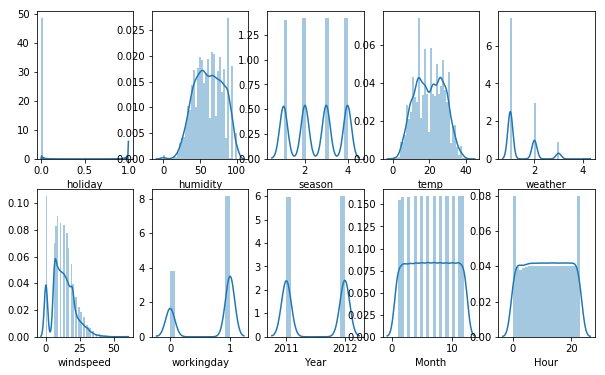

In [19]:
fig=plt.figure(figsize=(10,6))


plt.subplot(2,5,1)
#holiday
sns.distplot(train_new['holiday'])

plt.subplot(2,5,2)
#hhumidity
sns.distplot(train_new['humidity'])

plt.subplot(2,5,3)
#season
sns.distplot(train_new['season'])

plt.subplot(2,5,4)
#temp
sns.distplot(train_new['temp'])

plt.subplot(2,5,5)
#weather
sns.distplot(train_new['weather'])

plt.subplot(2,5,6)
#windspeed
sns.distplot(train_new['windspeed'])

plt.subplot(2,5,7)
#workingday
sns.distplot(train_new['workingday'])

plt.subplot(2,5,8)
#year
sns.distplot(train_new['Year'])

plt.subplot(2,5,9)
#Month
sns.distplot(train_new['Month'])

plt.subplot(2,5,10)
#Hour
sns.distplot(train_new['Hour'])

In [21]:
num=train_new.select_dtypes(include=[np.number])

In [22]:
feature=(x for x in num.columns)
for i in feature:
    print train_new[i].value_counts()

31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
16.665    381
25.000    365
33.335    364
21.210    356
30.305    350
15.150    338
21.970    328
24.240    327
17.425    314
31.820    299
34.850    283
27.275    282
32.575    272
11.365    271
14.395    269
29.545    257
19.695    255
15.910    254
12.880    247
13.635    237
34.090    224
12.120    195
28.790    175
23.485    170
10.605    166
35.605    159
9.850     127
18.180    123
36.365    123
37.120    118
9.090     107
37.880     97
28.030     80
7.575      75
38.635     74
6.060      73
39.395     67
6.820      63
8.335      63
18.940     45
40.150     45
40.910     39
5.305      25
42.425     24
41.665     23
3.790      16
4.545      11
43.940      7
43.180      7
2.275       7
3.030       7
44.695      3
0.760       2
1.515       1
45.455      1
Name: atemp, dtype: int64
0.0      986
1.0      667
2.0      487
3.0      438
4.0      354
5.0      332
6.0      269
8.0      250
7.0      250
9.0      230
10.0

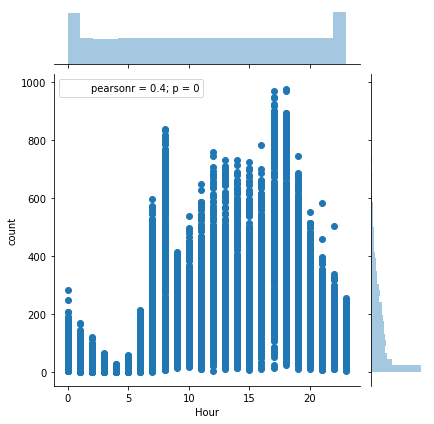

In [23]:
sns.jointplot(x='Hour',y='count',data=train_new)

More People tends to ride the bike in the evening which explains the spike in the graph.

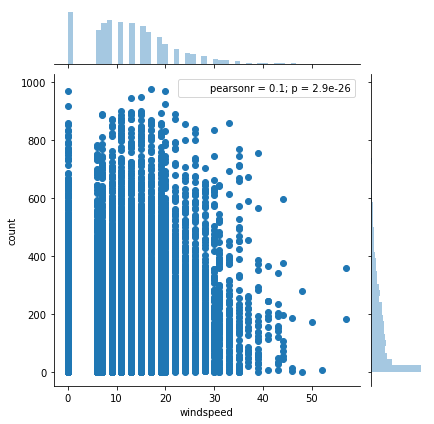

In [24]:
sns.jointplot(x='windspeed',y='count',data=train_new)

More people tends to ride the bike when wind speed is very less.

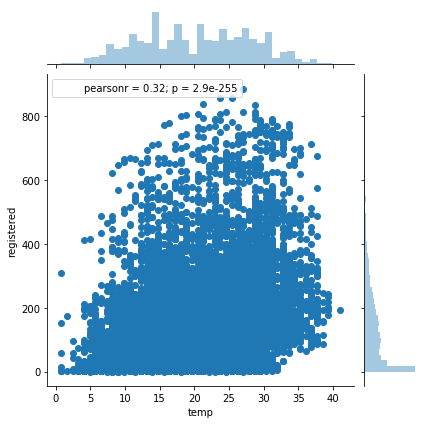

In [25]:
sns.jointplot(x='temp',y='registered',data=train)

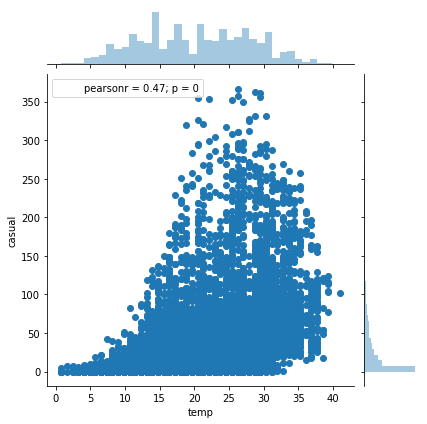

In [26]:
sns.jointplot(x='temp',y='casual',data=train)

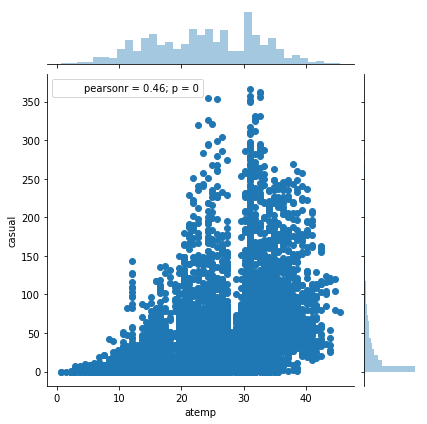

In [27]:
sns.jointplot(x='atemp',y='casual',data=train)

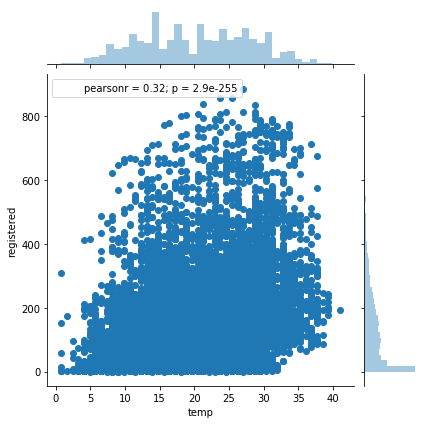

In [28]:
sns.jointplot(x='temp',y='registered',data=train)

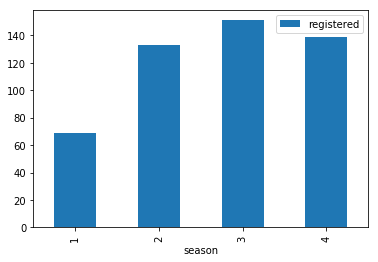

In [29]:
pivot=train.pivot_table(index='season',values='registered',aggfunc=np.median)
pivot.plot(kind='bar')

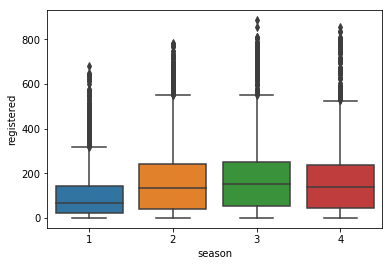

In [30]:
sns.boxplot(x='season',y='registered',data=train)

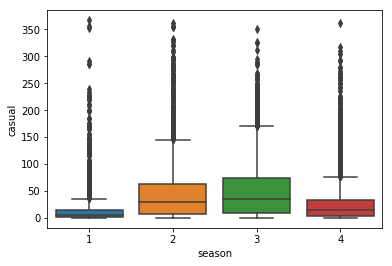

In [31]:
sns.boxplot(x='season',y='casual',data=train)

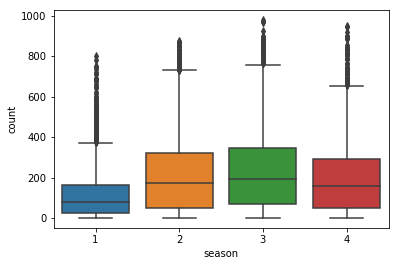

In [32]:
sns.boxplot(x='season',y='count',data=train)

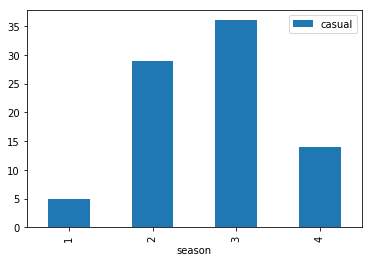

In [33]:
pivot=train.pivot_table(index='season',values='casual',aggfunc=np.median)
pivot.plot(kind='bar')

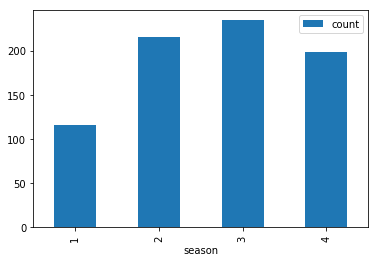

In [34]:
pivot=train.pivot_table(index='season',values='count',aggfunc=np.mean)
pivot.plot(kind='bar')

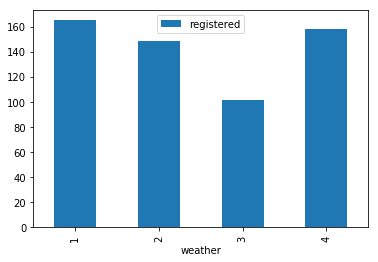

In [35]:
pivot=train.pivot_table(index='weather',values='registered',aggfunc=np.mean)
pivot.plot(kind='bar')

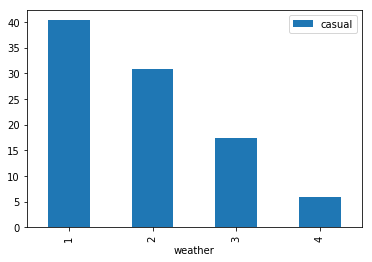

In [36]:
pivot=train.pivot_table(index='weather',values='casual',aggfunc=np.mean)
pivot.plot(kind='bar')

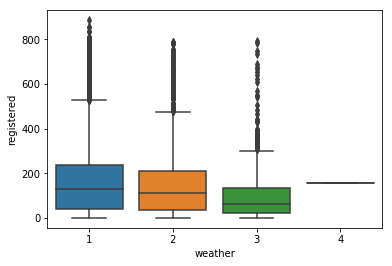

In [37]:
sns.boxplot(x='weather',y='registered',data=train)

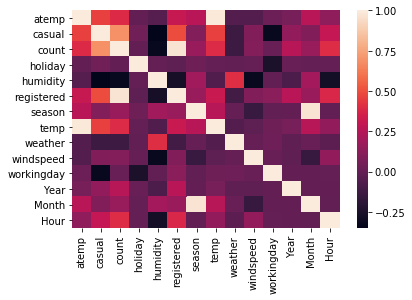

In [38]:
#find the correlation
corr=train_new.corr()
sns.heatmap(corr)

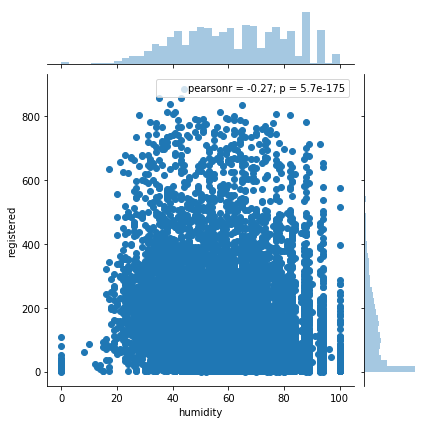

In [39]:
sns.jointplot(x='humidity',y='registered',data=train)

In [40]:
corr['count'].sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
Hour          0.400601
temp          0.394454
atemp         0.389784
Year          0.260403
Month         0.166862
season        0.163439
windspeed     0.101369
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

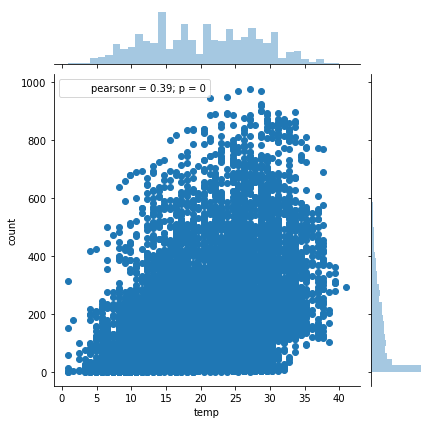

In [41]:
sns.jointplot(x='temp',y='count',data=train_new)

In [42]:
#Its time for some feature selection baby
hr={0:3,1:3,2:3,3:3,4:3,5:3,6:3,7:1,8:1,9:2,10:2,11:2,12:1,13:1,14:1,15:1,16:1,17:1,18:1,19:1,20:2,21:2,22:2,23:3}

alldata['Hour_bin']=alldata['Hour'].map(hr)

In [43]:
alldata['Hour_bin'].value_counts()

1    7285
3    5729
2    4365
Name: Hour_bin, dtype: int64

In [44]:
alldata['IsHourGood']=(alldata['Hour_bin']==1)*1
alldata['IsHourGood'].value_counts()

0    10094
1     7285
Name: IsHourGood, dtype: int64

In [45]:
#Now it time for Temperature
bins=[-10,0,10,15,30,50]
groups=[0,1,2,3,4]
cate=pd.cut(alldata.temp,bins,labels=groups)
alldata.temp=cate

In [46]:
alldata['cas_good_temp']=(alldata['temp']==3)*1
alldata['reg_good_temp']=((alldata['temp']==3)|(alldata['temp']==2))*1

In [47]:
alldata['reg_good_temp'].value_counts()

1    13251
0     4128
Name: reg_good_temp, dtype: int64

In [48]:
#Now it time for atemp
bins=[-10,0,10,15,30,50]
groups=[0,1,2,3,4]
cate=pd.cut(alldata.atemp,bins,labels=groups)
alldata.atemp=cate

In [49]:
alldata['cas_good_atemp']=(alldata['atemp']==3)*1
alldata['reg_good_atemp']=((alldata['atemp']==3)|(alldata['atemp']==2))*1

In [50]:
alldata['cas_good_atemp'].value_counts()

1    8894
0    8485
Name: cas_good_atemp, dtype: int64

In [51]:
#Timeforseason
alldata['Seasn_good_reg']=((alldata['season']==2)|(alldata['season']==3)|(alldata['season']==4))*1
alldata['Seasn_good_cas']=((alldata['season']==2)|(alldata['season']==3))*1

In [52]:
alldata['Seasn_good_reg'].value_counts()

1    13137
0     4242
Name: Seasn_good_reg, dtype: int64

In [53]:
#Timeforweather
alldata['IsWeatherGood']=((alldata['weather']==1)|(alldata['weather']==2))*1
alldata['IsWeatherGood'].value_counts()

1    15957
0     1422
Name: IsWeatherGood, dtype: int64

In [54]:
def f(x):    
    return x[0] + x[1] 
alldata2=alldata[['Year','Month']]
alldata2.apply(f,axis=1)

0       2012
1       2012
2       2012
3       2012
4       2012
5       2012
6       2012
7       2012
8       2012
9       2012
10      2012
11      2012
12      2012
13      2012
14      2012
15      2012
16      2012
17      2012
18      2012
19      2012
20      2012
21      2012
22      2012
23      2012
24      2012
25      2012
26      2012
27      2012
28      2012
29      2012
        ... 
6463    2024
6464    2024
6465    2024
6466    2024
6467    2024
6468    2024
6469    2024
6470    2024
6471    2024
6472    2024
6473    2024
6474    2024
6475    2024
6476    2024
6477    2024
6478    2024
6479    2024
6480    2024
6481    2024
6482    2024
6483    2024
6484    2024
6485    2024
6486    2024
6487    2024
6488    2024
6489    2024
6490    2024
6491    2024
6492    2024
Length: 17379, dtype: int64

In [55]:
def mal(x):
        if (((x[0]==2011) & (x[1]==1))|((x[0]==2011) & (x[1]==2))|((x[0]==2011) & (x[1]==3))):
             l=1
        elif (((x[0]==2011) & (x[1]==4))|((x[0]==2011) & (x[1]==5))|((x[0]==2011) & (x[1]==6))):
             l=2
        elif (((x[0]==2011) & (x[1]==7))|((x[0]==2011) & (x[1]==8))|((x[0]==2011) & (x[1]==9))):
            l=3
        elif (((x[0]==2011) & (x[1]==10))|((x[0]==2011) & (x[1]==11))|((x[0]==2011) & (x[1]==12))):
            l=4
        elif (((x[0]==2012) & (x[1]==1))|((x[0]==2012) & (x[1]==2))|((x[0]==2012) & (x[1]==3))):
             l=5
        elif (((x[0]==2012) & (x[1]==4))|((x[0]==2012) & (x[1]==5))|((x[0]==2012) & (x[1]==6))):
             l=6
        elif (((x[0]==2012) & (x[1]==7))|((x[0]==2012) & (x[1]==8))|((x[0]==2012) & (x[1]==9))):
            l=7
        else:
            l=8
           
          
        return l

In [56]:
alldata2=alldata[['Year','Month']]
alldata['year_part']=alldata2.apply(mal,axis=1)

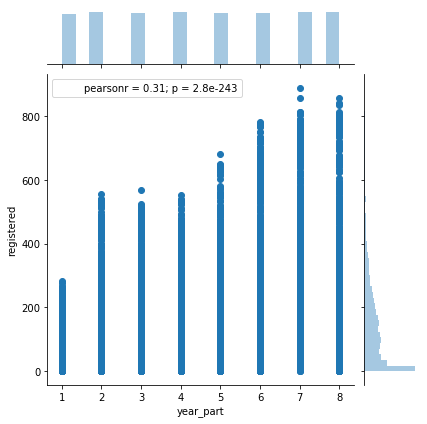

In [57]:
sns.jointplot(x='year_part',y='registered',data=alldata)

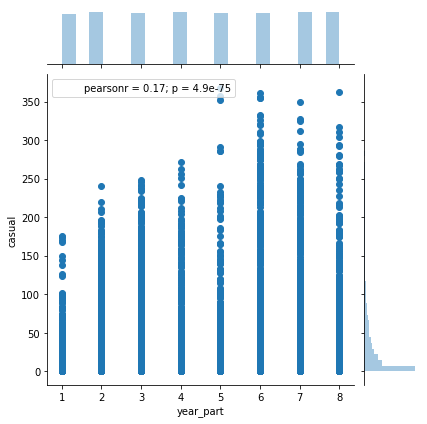

In [71]:
sns.jointplot(x='year_part',y='casual',data=alldata)

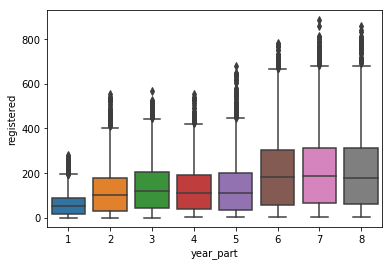

In [77]:
sns.boxplot(x='year_part',y='registered',data=alldata)

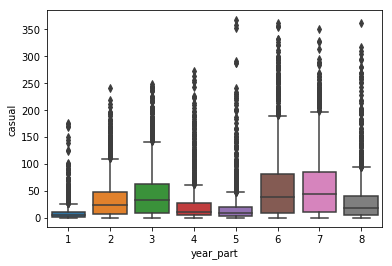

In [72]:
sns.boxplot(x='year_part',y='casual',data=alldata)

In [73]:
alldata['Good_Tym_of_year_reg']=(alldata['year_part']>=6)*1

In [74]:
alldata['Good_Tym_of_year_cas']=((alldata['year_part']==6)|(alldata['year_part']==7))*1

In [76]:
alldata['Good_Tym_of_year_cas'].value_counts()

0    12989
1     4390
Name: Good_Tym_of_year_cas, dtype: int64

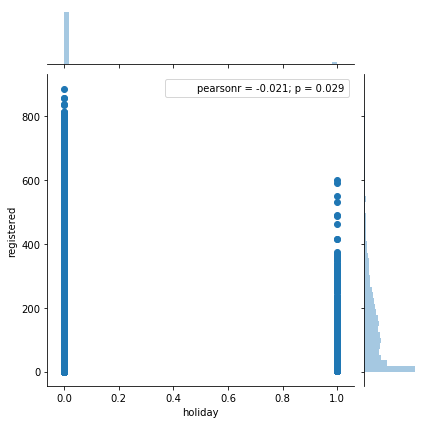

In [59]:
sns.jointplot(x='holiday',y='registered',data=train)

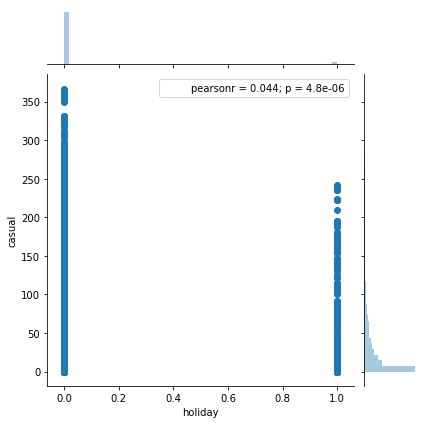

In [60]:
sns.jointplot(x='holiday',y='casual',data=train)

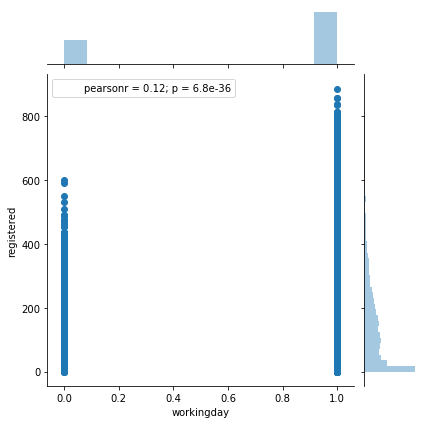

In [61]:
sns.jointplot(x='workingday',y='registered',data=train)

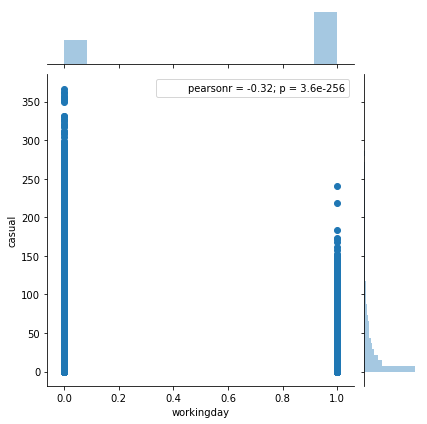

In [62]:
sns.jointplot(x='workingday',y='casual',data=train)

In [63]:
def f(x):
    if (x[0]==0|x[[1]==1]):
        return 1
    else:
        return 0

def f1(x):
    if (x[0]==0|x[[1]==0]):
        return 1
    else:
        return 0

        

In [64]:
alldata1=alldata[['holiday','workingday']]
alldata['Iscylday_reg']=alldata2.apply(f,axis=1)
alldata['Iscylday_cas']=alldata2.apply(f1,axis=1)

In [84]:
alldata.head()

,atemp,casual,count,holiday,humidity,registered,season,temp,weather,windspeed,...,cas_good_atemp,reg_good_atemp,Seasn_good_reg,Seasn_good_cas,IsWeatherGood,year_part,Iscylday_reg,Iscylday_cas,Good_Tym_of_year_reg,Good_Tym_of_year_cas
0,2,3.0,16.0,0,81,13.0,1,1,1,0.0,...,0,1,0,0,1,1,1,1,0,0
1,2,8.0,40.0,0,80,32.0,1,1,1,0.0,...,0,1,0,0,1,1,1,1,0,0
2,2,5.0,32.0,0,80,27.0,1,1,1,0.0,...,0,1,0,0,1,1,1,1,0,0
3,2,3.0,13.0,0,75,10.0,1,1,1,0.0,...,0,1,0,0,1,1,1,1,0,0
4,2,0.0,1.0,0,75,1.0,1,1,1,0.0,...,0,1,0,0,1,1,1,1,0,0


In [83]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 27 columns):
atemp                   17379 non-null category
casual                  10886 non-null float64
count                   10886 non-null float64
holiday                 17379 non-null int64
humidity                17379 non-null int64
registered              10886 non-null float64
season                  17379 non-null int64
temp                    17379 non-null category
weather                 17379 non-null int64
windspeed               17379 non-null float64
workingday              17379 non-null int64
Month                   17379 non-null int64
Hour                    17379 non-null int64
Hour_bin                17379 non-null int64
IsHourGood              17379 non-null int64
cas_good_temp           17379 non-null int64
reg_good_temp           17379 non-null int64
cas_good_atemp          17379 non-null int64
reg_good_atemp          17379 non-null int64
Seasn_good_reg         

In [82]:
alldata=alldata.drop(['datetime','Year','Good_Tym_of_year'],axis=1)

In [90]:
train_new=alldata[alldata['count'].notnull()]
test_new=alldata[alldata['count'].isnull()]

In [92]:
train_new.shape

(10886, 27)

In [95]:
test_new=test_new.drop(['registered','casual','count'],axis=1)

In [96]:
test_new.shape

(6493, 24)

In [102]:
#log transfer target variable
print train_new['registered'].skew()
target1=np.log(train_new['registered']+1)
print target1.skew()

1.52480458682
-0.855561756537


In [103]:
print train_new['casual'].skew()
target2=np.log(train_new['casual']+1)
print target2.skew()

2.49574839798
-0.224722528924


In [104]:
train_val=train_new.drop(['registered','casual','count'],axis=1)

In [106]:
train_reg=train_val.copy()

In [140]:
feat=['Good_Tym_of_year_cas','Iscylday_cas','Seasn_good_cas','cas_good_atemp','cas_good_temp']
train_reg=train_reg.drop(feat,axis=1)
test_reg=test_new.drop(feat,axis=1)

In [142]:
test_reg.shape

(6493, 19)

In [141]:
feat2=['Good_Tym_of_year_reg','Iscylday_reg','Seasn_good_reg','reg_good_atemp','reg_good_temp']
train_cas=train_val.drop(feat,axis=1)
test_cas=test_new.drop(feat2,axis=1)

In [143]:
test_cas.shape

(6493, 19)

In [113]:
train_cas.shape

(10886, 19)

In [114]:
train_reg.shape

(10886, 19)

In [120]:
#time to train the model
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as ms
from sklearn.model_selection import KFold

In [116]:
x1=np.array(train_reg)
x1=np.array(train_cas)


In [125]:
#Lasso For registered
clf1=Lasso(alpha=0.1)
kf=KFold(n_splits=10)
outcomes=[]
for train_index,test_index in kf.split(x1):
        x_train,x_test=train_reg.values[train_index],train_reg.values[test_index]
        y_train,y_test=target1.values[train_index],target1.values[test_index]
        clf1.fit(x_train,y_train)
        y_pred=clf1.predict(x_test)
        accuracy=ms(y_test,y_pred)
        print accuracy
        outcomes.append(accuracy)
mean=np.mean(outcomes)
print 'Mean Accuracy',mean

1.07441759365
0.701470831849
0.674032503337
0.639432457564
0.688996727473
0.803264212577
0.75415754684
0.649569787963
0.634985403346
0.691197119033
Mean Accuracy 0.731152418363


In [126]:
#Lasso For casual
clf2=Lasso(alpha=0.1)
kf=KFold(n_splits=10)
outcomes=[]
for train_index,test_index in kf.split(x1):
        x_train,x_test=train_cas.values[train_index],train_cas.values[test_index]
        y_train,y_test=target2.values[train_index],target2.values[test_index]
        clf2.fit(x_train,y_train)
        y_pred=clf2.predict(x_test)
        accuracy=ms(y_test,y_pred)
        print accuracy
        outcomes.append(accuracy)
mean=np.mean(outcomes)
print 'Mean Accuracy',mean

1.05162879465
0.839500433585
0.601048966316
0.679115326642
0.832999920767
0.945357861129
0.991926473584
0.69459004375
0.693301470742
0.712286178147
Mean Accuracy 0.804175546932


In [137]:
#GradientBoost For registered
clf1=GradientBoostingRegressor(learning_rate=0.1,alpha=0.1)
kf=KFold(n_splits=10)
outcomes=[]
for train_index,test_index in kf.split(x1):
        x_train,x_test=train_reg.values[train_index],train_reg.values[test_index]
        y_train,y_test=target1.values[train_index],target1.values[test_index]
        clf1.fit(x_train,y_train)
        y_pred=clf1.predict(x_test)
        accuracy=ms(y_test,y_pred)
        print accuracy
        outcomes.append(accuracy)
mean=np.mean(outcomes)
print 'Mean Accuracy',mean

0.223878004434
0.260758122172
0.12114455141
0.141956946347
0.152354385006
0.167190735288
0.163898757136
0.11568858365
0.128399864488
0.129213062783
Mean Accuracy 0.160448301272


In [146]:
reg=clf1.predict(test_reg)
reg1=np.exp(reg)-1

In [147]:
#GradientBoost For casual
clf2=GradientBoostingRegressor(learning_rate=0.4,alpha=0.1)
kf=KFold(n_splits=10)
outcomes=[]
for train_index,test_index in kf.split(x1):
        x_train,x_test=train_cas.values[train_index],train_cas.values[test_index]
        y_train,y_test=target2.values[train_index],target2.values[test_index]
        clf2.fit(x_train,y_train)
        y_pred=clf2.predict(x_test)
        accuracy=ms(y_test,y_pred)
        print accuracy
        outcomes.append(accuracy)
mean=np.mean(outcomes)
print 'Mean Accuracy',mean

0.544661135634
0.481909756368
0.243320689282
0.245516658132
0.346669152119
0.460627856573
0.398440732144
0.228897695291
0.245922661904
0.302708474272
Mean Accuracy 0.349867481172


In [148]:
reg=clf2.predict(test_cas)
reg2=np.exp(reg)-1

In [154]:
reg1.shape


(6493,)

In [150]:
reg2.shape

(6493,)

In [151]:
count=reg1+reg2

In [152]:
count.shape

(6493,)

In [159]:
ids=test['datetime']
output = pd.DataFrame({ 'datetime' : ids, 'count': count })
out1=pd.DataFrame(output,columns=['datetime','count'])

In [162]:
out1.to_csv('/home/abhi/Desktop/CSV/BikeShare.csv',index=False)